In [3]:
#Loading image

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
def create_training_data():
    #DATADIR='drive/My Drive/Input Dataset'
    DATADIR = 'D:\\Pavan\\Input Dataset'
    CATEGORIES = ['non text input areas','text input areas']
    img_array = []
    training_data = []
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                image = cv2.imread(os.path.join(path,img))
                image = cv2.resize(image,(200,100))
                img_array.append(image)
                #print(class_num)
                training_data.append([image,class_num])
            except Exception as E:
                pass
    #print(len(img_array))
  #  img = cv2.cvtColor(img_array[112],cv2.COLOR_BGR2GRAY)
    # plt.imshow(img,cmap='gray')
    #print(training_data[1])
    return training_data
print(len(create_training_data()))

import random
training_data = create_training_data()
random.shuffle(training_data)


X = []
y = []
IMG_SIZE=100
for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, 2*IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, 2*IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

233


In [1]:
#train using dataset

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split = 0.2)
model.save('CNN Model')

Train on 186 samples, validate on 47 samples
Epoch 1/3
186/186 [==============================] - 167s 899ms/sample - loss: 3.2732 - accuracy: 0.4892 - val_loss: 0.6381 - val_accuracy: 0.8511
Epoch 2/3
186/186 [==============================] - 91s 487ms/sample - loss: 0.7046 - accuracy: 0.5591 - val_loss: 0.6099 - val_accuracy: 0.7021
Epoch 3/3
186/186 [==============================] - 85s 455ms/sample - loss: 0.5729 - accuracy: 0.6613 - val_loss: 0.6698 - val_accuracy: 0.7234
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: CNN Model\assets


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


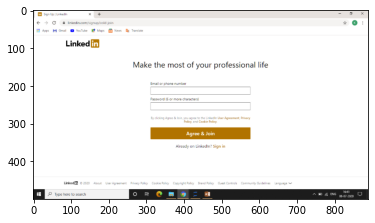

In [1]:
import cv2
import pytesseract
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def reorder(myPoints):
    myPoints = myPoints.reshape((4, 2))  
    #print(myPoints)
    myPointsNew = np.zeros((4, 1, 2), np.int32)  
    add = myPoints.sum(1)
    #print(add)
    #print(np.argmax(add))
    myPointsNew[0] = myPoints[np.argmin(add)]  
    myPointsNew[3] = myPoints[np.argmax(add)]  
    diff = np.diff(myPoints, axis=1)
    myPointsNew[1] = myPoints[np.argmin(diff)]  
    myPointsNew[2] = myPoints[np.argmax(diff)] 

    return myPointsNew

def prepare(filepath):
    IMG_SIZE = 100
    #img_array = cv2.imread(filepath)
    new_array = cv2.resize(filepath, (2*IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, 2*IMG_SIZE, IMG_SIZE, 3)


##################################################################
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
#pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'
config = ("-l eng --oem 1 --psm 7")
path = cv2.imread("D:\\Pavan\\Webpages\\linkedin_login.png")
saving_path = 'D:\\Pavan\\Webpages\\Outputs\\linked_login_NeuralNetwork.png'
#path = cv2.imread('drive/My Drive/Webpages/j.PNG')
model = tf.keras.models.load_model("CNN Model")
#################################################################
(h,w,d) = path.shape

#resizing image
new_h = 500
new_w = (int)(500*w/h)
new_d=d

path= cv2.resize(path,(new_w,new_h))
plt.imshow(path,cmap='gray')
path1 = path.copy()
img = cv2.cvtColor(path,cv2.COLOR_BGR2GRAY)
#cv2.imshow("Gray website window",img)
img1=img.copy()
img2 = img.copy()
img3 = img.copy()

G_blur = cv2.GaussianBlur(img1,(3,3),10)
G_blur1 = cv2.medianBlur(img2,3)
G_blur2 = cv2.bilateralFilter(img2,3,5,10)
#cv2.imshow("Gblur", G_blur)

canny = cv2.Canny(G_blur,1,10)
canny1 = cv2.Canny(G_blur1,1,10)
canny2 = cv2.Canny(G_blur2,1,10)
#cv2.imshow("Canny",canny)

im,contours,hierarchy = cv2.findContours(canny,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
im,contours1,hierarchy1 = cv2.findContours(canny1,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
im,contours2,hierarchy2 = cv2.findContours(canny2,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

contours = np.append(contours, contours1)
contours = np.append(contours, contours2)

imgWarpColored = []
for c in contours:
    #k=cv2.contourArea(c)
    #if k>500 and k<50000:
    peri = cv2.arcLength(c, True)  # LENGTH OF CONTOUR
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx)==4:
        #print(approx)
        #print(approx[1,0,0])
        approx = reorder(approx)
        #print(approx)
        pts1 = np.float32(approx)
        widthImg = approx[1,0,0] - approx[0,0,0]
        heightImg = approx[2,0,1]-approx[0,0,1]
        #print(str(widthImg) + ' ' + str(heightImg))
        pts2 = np.float32([[0, 0], [widthImg, 0],  [0, heightImg], [widthImg, heightImg]])  # PREPARE POINTS FOR WARP
        matrix = cv2.getPerspectiveTransform(pts1, pts2)  # GET TRANSFORMATION MATRIX
        img = cv2.warpPerspective(path, matrix, (widthImg, heightImg))
        prediction = model.predict([prepare(img)])
        if int(prediction[0][0]) == 1:
            imgWarpColored.append(img)
            cnt = cv2.drawContours(path, c, -1, (0, 255, 0), 2)
            print(prediction[0][0])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ret,thresh1 = cv2.threshold(img,200,255,cv2.THRESH_BINARY)
            img = cv2.resize(thresh1,None,fx=3, fy=3, interpolation = cv2.INTER_CUBIC)
            boxes = pytesseract.image_to_data(img)
            for a,b in enumerate(boxes.splitlines()):
                #print(b)
                if a!=0:
                    b = b.split()
                    #if len(b)==12:
                    x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
                    x=int((x+1)/3)
                    y=int((y+1)/3)
                    w=int((w+1)/3)
                    h=int((h+1)/3)
                    x=x+approx[0,0,0]
                    y=y+approx[0,0,1]
                    if (w*h)<500 and (w*h)>20:
                        cv2.rectangle(path, (x,y), (x+w, y+h), (0, 0, 255), 1)
             

cv2.imshow('final ',path)
cv2.imwrite(saving_path,path)

CATEGORIES = ["input text boxes", "Non input text boxes"]

cv2.waitKey(0)
cv2.destroyAllWindows()